### Práctica 21 El Perceptrón Básico

Este ejercicio pone de manifiesto el particionamiento del dataset en entrenamiento-validación-test.\
Al hilo de esto, conviene matizar que si no se plantea llevar a cabo ajuste de hiperparámetros (como la tasa de aprendizaje, regularización, etc.), la validación después de cada época no es estrictamente necesaria. Sin embargo, sigue siendo útil por las siguientes razones:

A. Detectar sobreajuste\
Incluso si no ajustas hiperparámetros, es importante asegurarte de que el modelo no esté sobreajustando. Un gráfico de accuracy en entrenamiento vs. validación puede ayudarte a detectar este problema.

B. Implementar early stopping\
Aunque no ajustes hiperparámetros, implementar early stopping puede ser útil para evitar entrenar innecesariamente el modelo después de que haya alcanzado su mejor rendimiento.

C. Entender el comportamiento del modelo\
La validación te proporciona información valiosa sobre cómo el modelo está aprendiendo. Por ejemplo:\

¿El modelo converge rápidamente o necesita más épocas?\
¿Hay oscilaciones en el rendimiento?\
¿El modelo generaliza bien desde el principio o necesita un período inicial de ajuste?\

Importante: aunque el perceptrón está diseñado para mejorar con el entrenamiento, hay situaciones en las que las métricas pueden empeorar después de cierto punto. Esto puede ocurrir por varias razones:\
a) Sobreajuste (Overfitting)\
b) Ruido en los Datos\
c) Convergencia Prematura:El perceptrón puede alcanzar un mínimo local o detenerse antes de encontrar la solución óptima.

---------------------------------------------------------------------------------------------------------

División de datos: Entrenamiento, Validación, Test o prueba (70-15-15)

Primera División (train_test_split). Dividimos el dataset original en dos partes:\
- 70%: Conjunto de entrenamiento (X_train, y_train).
- 30%: Datos temporales (X_temp, y_temp) que incluyen tanto el conjunto de validación como el de prueba.

Segunda División (train_test_split).Dividimos los datos temporales (X_temp, y_temp) en dos partes iguales:
- 15%: Conjunto de validación (X_val, y_val).
- 15%: Conjunto de prueba (X_test, y_test).

Limitación de train_test_split: Esta función solo divide en dos partes, por lo que necesitamos realizar dos divisiones consecutivas para obtener tres conjuntos.

--------------------------------------------------------------------------------------------------------------
NOTA: Se debe observar que el código requiere una serie de ajustes para acomodar el modelo a la idea de entrenamiento-validación-test de forma coherente, porque no la sigue. En uno de los ejercicios se te pide que ajustes el codigo de forma adeuada.

Tamaño del conjunto de entrenamiento: 280
Tamaño del conjunto de validación: 60
Tamaño del conjunto de prueba: 60


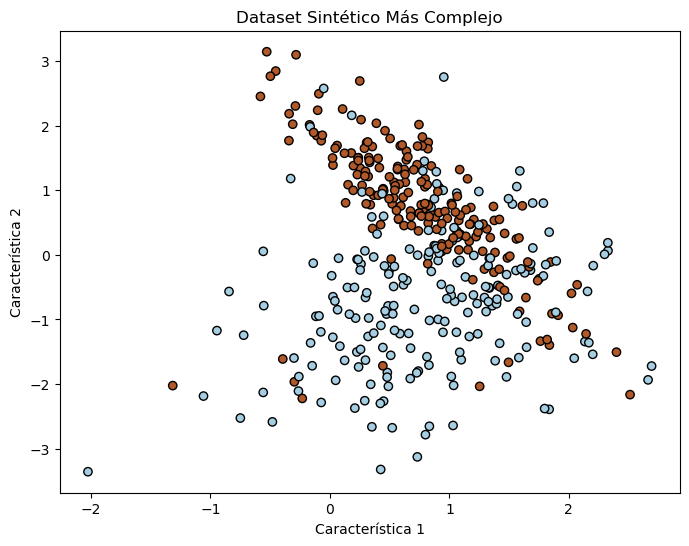

Epoca 0:
  Accuracy o precisión = 0.5036
  Weights = [-0.00302342 -0.00041874]
  Bias = -0.009999999999999997

Epoca 20:
  Accuracy o precisión = 0.5321
  Weights = [-0.01171234  0.00868736]
  Bias = -0.019999999999999997

Epoca 40:
  Accuracy o precisión = 0.6750
  Weights = [0.00153997 0.01775426]
  Bias = -0.019999999999999997

Epoca 60:
  Accuracy o precisión = 0.5036
  Weights = [-0.00409224  0.00040673]
  Bias = -0.009999999999999997

Epoca 80:
  Accuracy o precisión = 0.6786
  Weights = [0.00182412 0.01753653]
  Bias = -0.019999999999999997

Epoca 100:
  Accuracy o precisión = 0.6750
  Weights = [0.00177716 0.0175513 ]
  Bias = -0.019999999999999997

Epoca 120:
  Accuracy o precisión = 0.5036
  Weights = [-0.01097812  0.00308944]
  Bias = -0.019999999999999997

Epoca 140:
  Accuracy o precisión = 0.5036
  Weights = [-0.01102508  0.0031042 ]
  Bias = -0.019999999999999997

Epoca 160:
  Accuracy o precisión = 0.6214
  Weights = [-0.00619006  0.01590026]
  Bias = -0.019999999999999

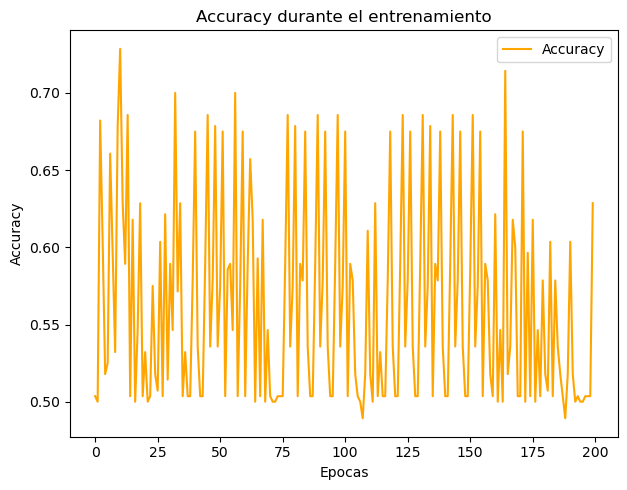

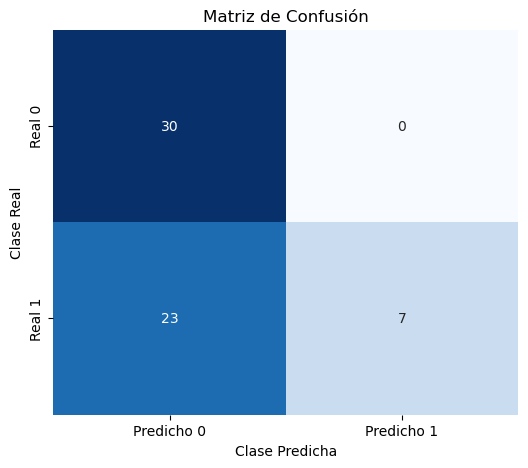

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split  # Para dividir el dataset
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generar un dataset sintético 
# Por defecto, la función make_classification genera un problema de clasificación binaria (es decir, con 2 clases).
# Esto significa que, si no especificas el parámetro n_classes, el dataset tendrá exactamente 2 clases , representadas por las etiquetas 0 y 1.
X, y = make_classification(
    n_samples=400,          # Número de muestras
    n_features=2,           # Número de características
    n_informative=2,        # Características informativas
    n_redundant=0,          # Sin características redundantes
    n_clusters_per_class=1, # Un grupo por clase
    class_sep=0.8,          # Separación entre clases (más pequeño -> más difícil)
    flip_y=0.1,             # Añadir ruido (10% de las etiquetas se invierten)
    random_state=42         # Semilla para reproducibilidad
)

# Dividir el dataset en entrenamiento (70%), validación (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # Primera división (70%-30%)
# Volvemos a partir
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Segunda división (15%-15%)

# Verificar los tamaños de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de validación: {X_val.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")

# Visualizar el dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k')
plt.title("Dataset Sintético Más Complejo")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

# Creación del perceptrón
perceptron = Perceptron(max_iter=200, eta0=0.01, random_state=42)

# Lista para almacenar valores de la métrica durante el entrenamiento
accuracies = []

# Entrenamiento del perceptrón con seguimiento de métricas y parámetros
for epoch in range(perceptron.max_iter):
    # Entrenamiento parcial (una iteración por epoca)
    # Los parametros solo se actualizan una vez después de entrenar con todos los registros
    perceptron.partial_fit(X_train, y_train, classes=np.unique(y_train))
    
    # Predicción
    y_pred = perceptron.predict(X_train)
    
    # Cálculo de métricas
    accuracy = accuracy_score(y_train, y_pred)  # Precisión
    accuracies.append(accuracy)
    
    # Mostrar métricas y parámetros cada 20 iteraciones
    if epoch % 20 == 0:
        print(f"Epoca {epoch}:")
        print(f"  Accuracy o precisión = {accuracy:.4f}")
        print(f"  Weights = {perceptron.coef_[0]}")  # Pesos del modelo
        print(f"  Bias = {perceptron.intercept_[0]}")  # Sesgo (bias)
        print()

# Evaluación en el conjunto de validación
y_val_pred = perceptron.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)


print("\nEvaluación en el Conjunto de Validación:")
print(f"  Accuracy en validación= {val_accuracy:.4f}")

# Evaluación final en el conjunto de prueba
y_test_pred = perceptron.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\nEvaluación en el Conjunto de Prueba:")
print(f"  Accuracy final en prueba = {test_accuracy:.4f}")

# Visualización de las métricas
plt.figure(figsize=(12, 5))


# Gráfico de la precisión
plt.subplot(1, 2, 2)
plt.plot(range(perceptron.max_iter), accuracies, label="Accuracy", color="orange")
plt.xlabel("Epocas")
plt.ylabel("Accuracy")
plt.title("Accuracy durante el entrenamiento")
plt.legend()

plt.tight_layout()
plt.show()

# Paso 2: Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)

# Paso 3: Mostrar la matriz de confusión como un heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicho 0", "Predicho 1"],
            yticklabels=["Real 0", "Real 1"])
plt.ylabel("Clase Real")
plt.xlabel("Clase Predicha")
plt.title("Matriz de Confusión")
plt.show()

Preguntas:\
1º ¿Que tipo de modelo genera el programa, regresión o clasificación?\
- Es de clasificación

2º ¿Qué metricas se utilizan en este programa?\
- accuracy_score y confusion_matrix.

3º Atendiendo al código anterior, ¿Crees que están bien planteadas las fases de entrenamiento, validación y test? Razona la respuesta\
- Durante el entrenamiento, no se usa correctamente el conjunto de validación para comprobar cómo mejora o empeora el modelo en cada época.

4º ¿Cuantas epocas se gestionan?\
- Se gestionan 1000 épocas

5º ¿Cuantos registros del dataset se utilizan en cada iteración? ¿y en cada epoca?\
- En cada iteración utiliza un conjunto del dataset. Por época se usan 105

Ejercicio: Como ya se ha indicado en la introdución del programa, aunque el perceptrón está diseñado para mejorar con el entrenamiento, hay situaciones en las que las métricas pueden empeorar después de cierto punto. Esto puede ocurrir por varias razones:\
a) Sobreajuste (Overfitting)\
b) Ruido en los Datos\
c) Convergencia Prematura:El perceptrón puede alcanzar un mínimo local o detenerse antes de encontrar la solución óptima.

Teniendo en cuenta estas premisas y que el programa no memoriza y actualiza el mejor valor de las metricas, modificar el programa para conseguir que el perceptron actualice el valor de parametros que mejor metricas ofrezcan al finalizar el entrenamiento.

Compara ahora los valores de entrenamiento y test y determina si hay o no sobreajuste.

NOTA: Las siguientes dos lineas muestran como restaurar parámetros. Las puedes tomar como referencia para actualizar los parametros que mejores metricas hayan ofrecido al final del entrenamientote.\

perceptron.coef_ = best_weights\
perceptron.intercept_ = best_bias
